In [1]:
import numpy as np
import matplotlib.pyplot as plt
from filamentlib.VField import VField

In [39]:
def updateKappaBinorm(curve: np.array, tspan: list, numOfSteps: int):
    curves = np.zeros( (numOfSteps + 1, curve.shape[0], curve.shape[1]) )
    curves[0,:,:] = curve

    for i in range( 1, numOfSteps + 1 ):
        curves[i,:,:] = curves[i-1,:,:] + (tspan[1] - tspan[0])/numOfSteps*VField.KappaBinormal(curves[i-1,:,:])
    
    return curves

In [48]:
# Make the ellipse functions
E = lambda t: [ np.cos(t), 5 * np.sin(t), t*0 ]
EPoints = np.linspace( 0, 2 * np.pi, 200, endpoint=False )


# Find values on the ellipse
s = np.array( E(EPoints) )

tspan = [0,100000]
numOfSteps = 100
curves = updateKappaBinorm(s, tspan, numOfSteps)

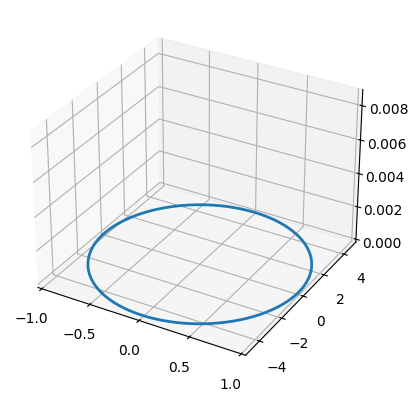

In [49]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Assuming 'curves' is your NumPy array with the shape (1001, 3, 200)
# curves = np.random.rand(1001, 3, 200)  # Example initialization

# Set up the figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the axes properties (adjust these limits according to your data)
ax.set_xlim([np.min(curves[:, 0, :]), np.max(curves[:, 0, :])])
ax.set_ylim([np.min(curves[:, 1, :]), np.max(curves[:, 1, :])])
ax.set_zlim([np.min(curves[:, 2, :]), np.max(curves[:, 2, :])])
# Initialize an empty line plot
line, = ax.plot([], [], [], lw=2)

# Update function for the animation
def update(frame):
    # Update the data of the line plot
    line.set_data(curves[frame, 0, :], curves[frame, 1, :])
    line.set_3d_properties(curves[frame, 2, :])
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(curves)), blit=False)

HTML(ani.to_jshtml())